In [25]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [26]:
train = pd.read_csv('../../data/main_data/train/train.csv')
test = pd.read_csv('../../data/main_data/test/test.csv')

combined = pd.concat([train,test])
combined

,name,dob,pos,height,foot,date,market_value,adjusted_market_value,team,league,...,red_card,rating,accuratePass,accurateLongBalls,accurateCross,accurateKeeperSweeper,expectedAssists,expectedGoals,xGChain,xGBuildup
0,noah mbamba,2005-01-04,D,187.0,right,2024-02-03,3000000.0,3000000,Bayer 04 Leverkusen,Bundesliga,...,0.0,5.414286,13.523810,0.619048,0.047619,0.000000,0.025627,0.001195,0.000000,0.000000
1,zachary duncan,2000-05-29,M,183.0,right,2021-11-07,300000.0,367916,AGF,Superligaen,...,0.0,6.545833,9.000000,0.458333,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000
2,manuel neuer,1986-03-26,G,193.0,right,2024-10-19,4000000.0,4000000,FC Bayern München,Bundesliga,...,0.0,6.536864,27.122881,5.411017,0.000000,0.495763,0.001084,0.000969,0.271096,0.270107
3,mickel miller,1995-12-01,M,173.0,left,2024-04-12,250000.0,250000,Plymouth Argyle,Championship,...,0.0,6.551163,13.837209,0.697674,0.418605,0.000000,0.067950,0.015244,0.000000,0.000000
4,gaetano monachello,1994-03-02,F,185.0,left,2016-05-15,900000.0,1191864,Atalanta,Serie A,...,0.0,6.550000,5.700000,0.200000,0.100000,0.000000,0.000000,0.111925,0.161218,0.061587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2337,arbnor mucolli,1999-09-14,F,175.0,left,2022-05-21,400000.0,464648,Vejle,"Superliga, Relegation Round",...,0.0,6.973077,22.923077,1.500000,0.557692,0.000000,0.000000,0.000000,0.000000,0.000000
2338,victor nelsson,1998-10-13,D,187.0,right,2021-08-08,3500000.0,4292353,FC København,Superligaen,...,0.0,6.784127,51.158730,3.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2339,elves balde,1999-10-01,M,168.0,right,2024-10-06,500000.0,500000,SC Farense,Liga Portugal Betclic,...,0.0,6.627273,4.666667,0.515152,0.484848,0.000000,0.044841,0.077558,0.000000,0.000000
2340,stephen duke-mckenna,2000-08-16,M,170.0,right,2023-10-07,150000.0,158450,Queens Park Rangers,Championship,...,0.0,5.433333,4.000000,0.833333,0.166667,0.000000,0.003164,0.000000,0.000000,0.000000


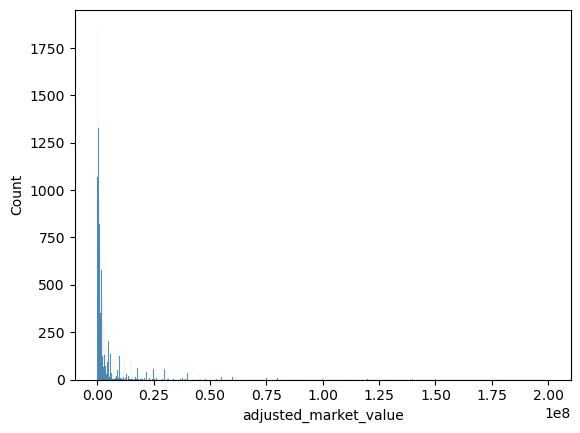

In [27]:
hist_comb = combined.copy()
sns.histplot(hist_comb,x='adjusted_market_value')
plt.show()

In [28]:
print(combined['adjusted_market_value'].kurt())
print(combined['adjusted_market_value'].skew())

84.07348374444683
7.248738885601478


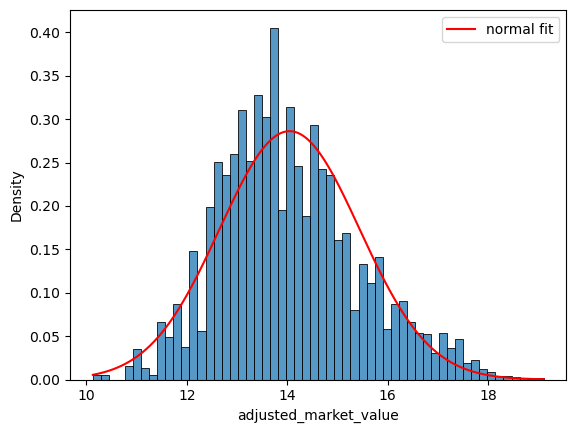

In [29]:
combined['adjusted_market_value'] = np.log1p(combined['adjusted_market_value'])
adjusted_target_col = combined['adjusted_market_value']
x=np.linspace(min(adjusted_target_col),max(adjusted_target_col),100000)
sns.histplot(data=combined,x='adjusted_market_value',stat='density')
mu,std = stats.norm.fit(adjusted_target_col)
plt.plot(x,stats.norm.pdf(x,mu,std),'r-',label='normal fit')
plt.legend()